<a href="https://colab.research.google.com/github/isaiahsthomas/Random-projects/blob/main/Consumption_and_income_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt

Read excel into a dataframe

In [ ]:
df = pd.read_excel("rpp1221.xlsx")

Drop columns that are unnecessary

In [ ]:
df.drop([0,0], inplace=True)

Add a new column range that numbers state values in an index

In [ ]:
df = df.reset_index()
df["StateNum"] = df['index']
df.drop(axis=1,columns= 'level_0', inplace=True)
df.drop(columns='Stateindex',inplace=True)

Rename columns with misspelled headers

In [ ]:
df.rename(columns={"Percent change Incoem":"Percent Change Income"},inplace=True)

Drop unneccesary columns created by index reset

In [ ]:
df.drop(columns=['index','level_0'],inplace=True)

Check dataframe

In [ ]:
df

Set a figure size for graphs in seaborn

In [ ]:
sns.set(rc={'figure.figsize':(20,20)})

Plot values of states across x axis and create scatterplot

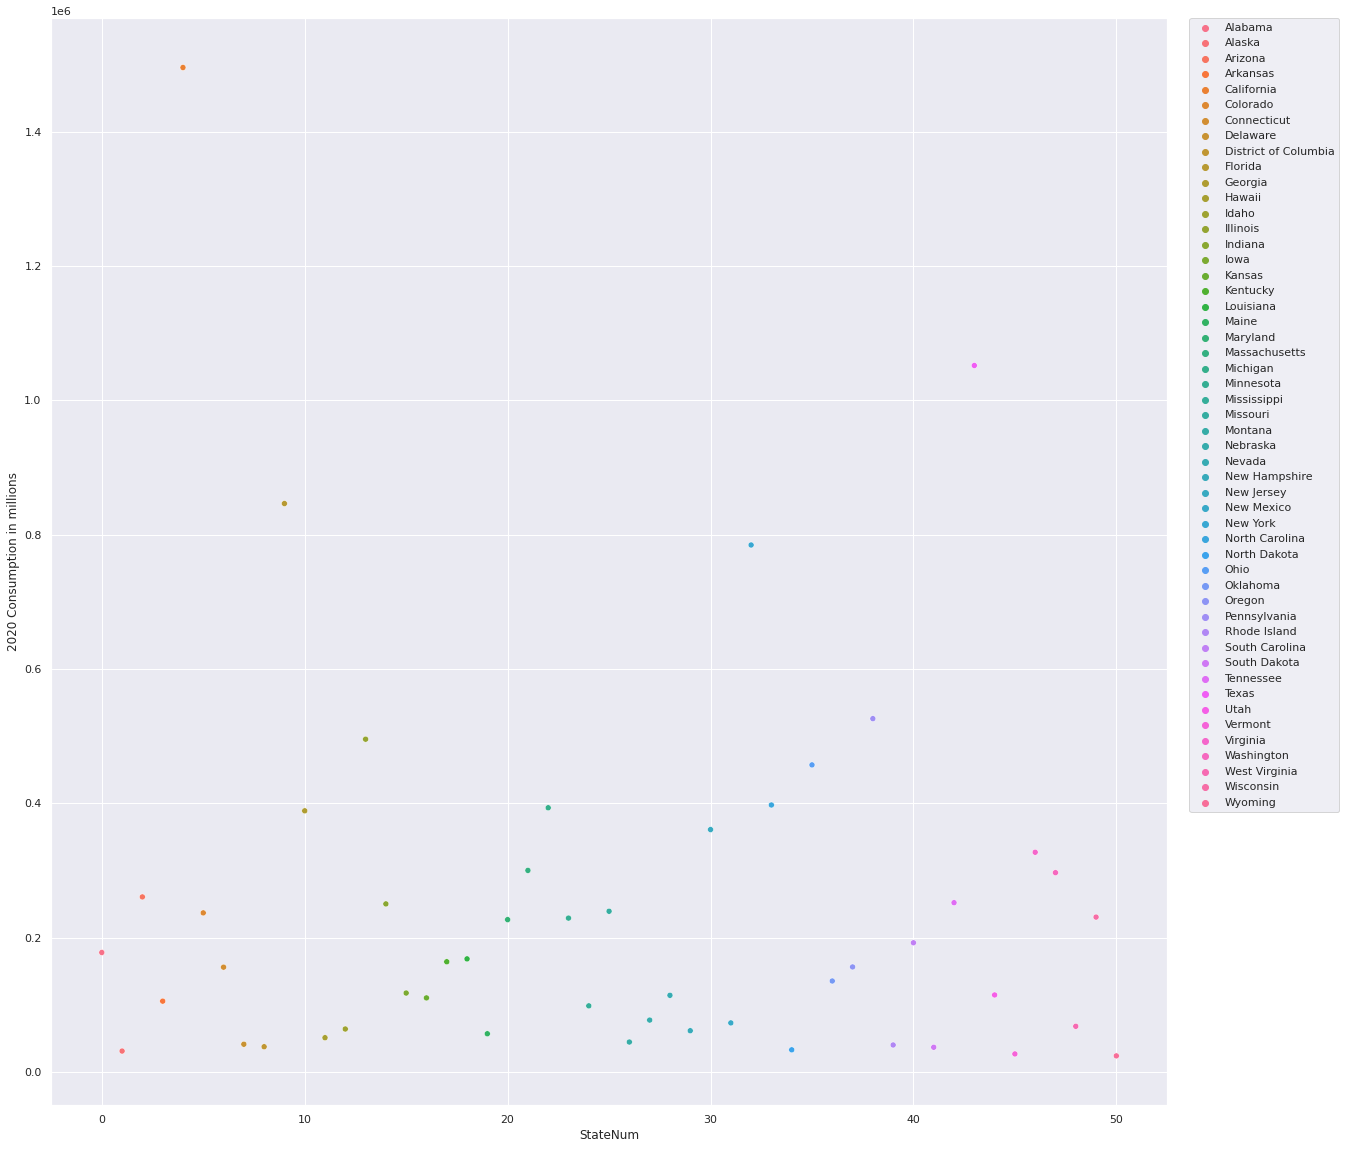

In [ ]:
from seaborn.palettes import color_palette

sns.scatterplot(data=df, x='StateNum',y="2020 Consumption in millions", hue='Region')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

Update excel file

In [ ]:
df.to_excel('/content/rpp1221.xlsx')

Check column names

In [ ]:
df.columns

Index(['Region', '2019 Consumption in millions',
       '2020 Consumption in millions', 'Percent change Consumption',
       '20192 Personal income in millions',
       '20203  Personal income in millions', 'Percent Change Income',
       'StateNum'],
      dtype='object')

Scrape a column of abbreviated state names from wikipedia 

In [ ]:
ajoin = pd.read_html("https://simple.wikipedia.org/wiki/List_of_U.S._states_by_traditional_abbreviation")

Select table that has state names

In [ ]:
lamdata = (ajoin[0])

join data and rename columns

In [ ]:
df.rename(columns={'Otherabbreviations': 'Abbrevs'},inplace=True)

sort values by descending value

In [ ]:
sample = df.sort_values(by=['20203  Personal income in millions'],ascending=False)

Plot bar plot

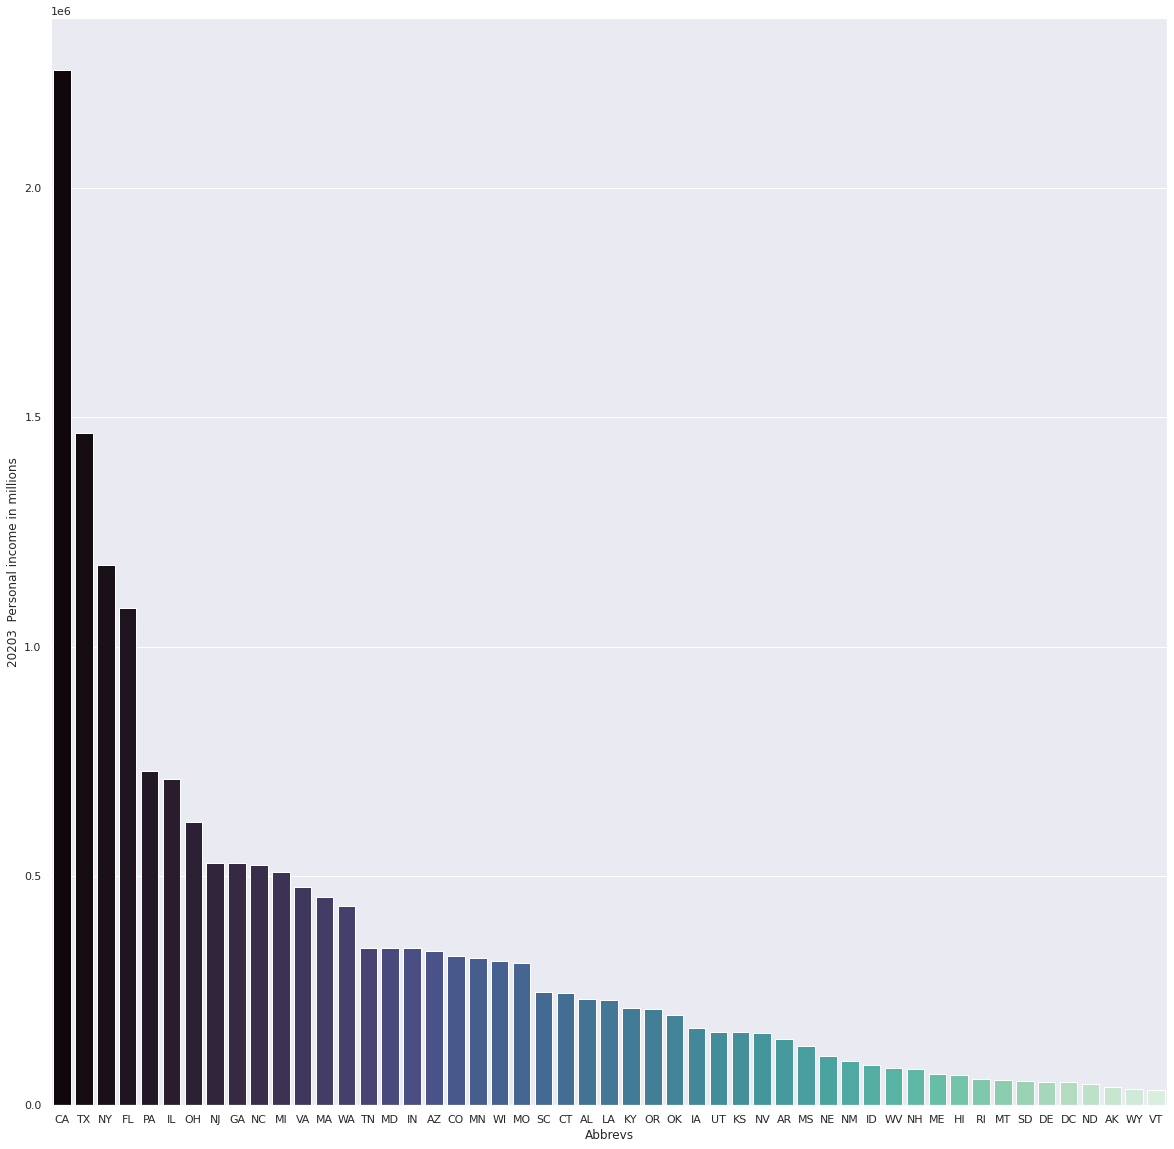

In [ ]:
sns.barplot(data=sample, x= 'Abbrevs', y='20203  Personal income in millions',palette='mako');


update excel file

In [ ]:
df.to_excel('/content/rpp1221.xlsx')

Set up a correlation matrix 

In [ ]:
corr = df.corr()

plot correlation heatmap

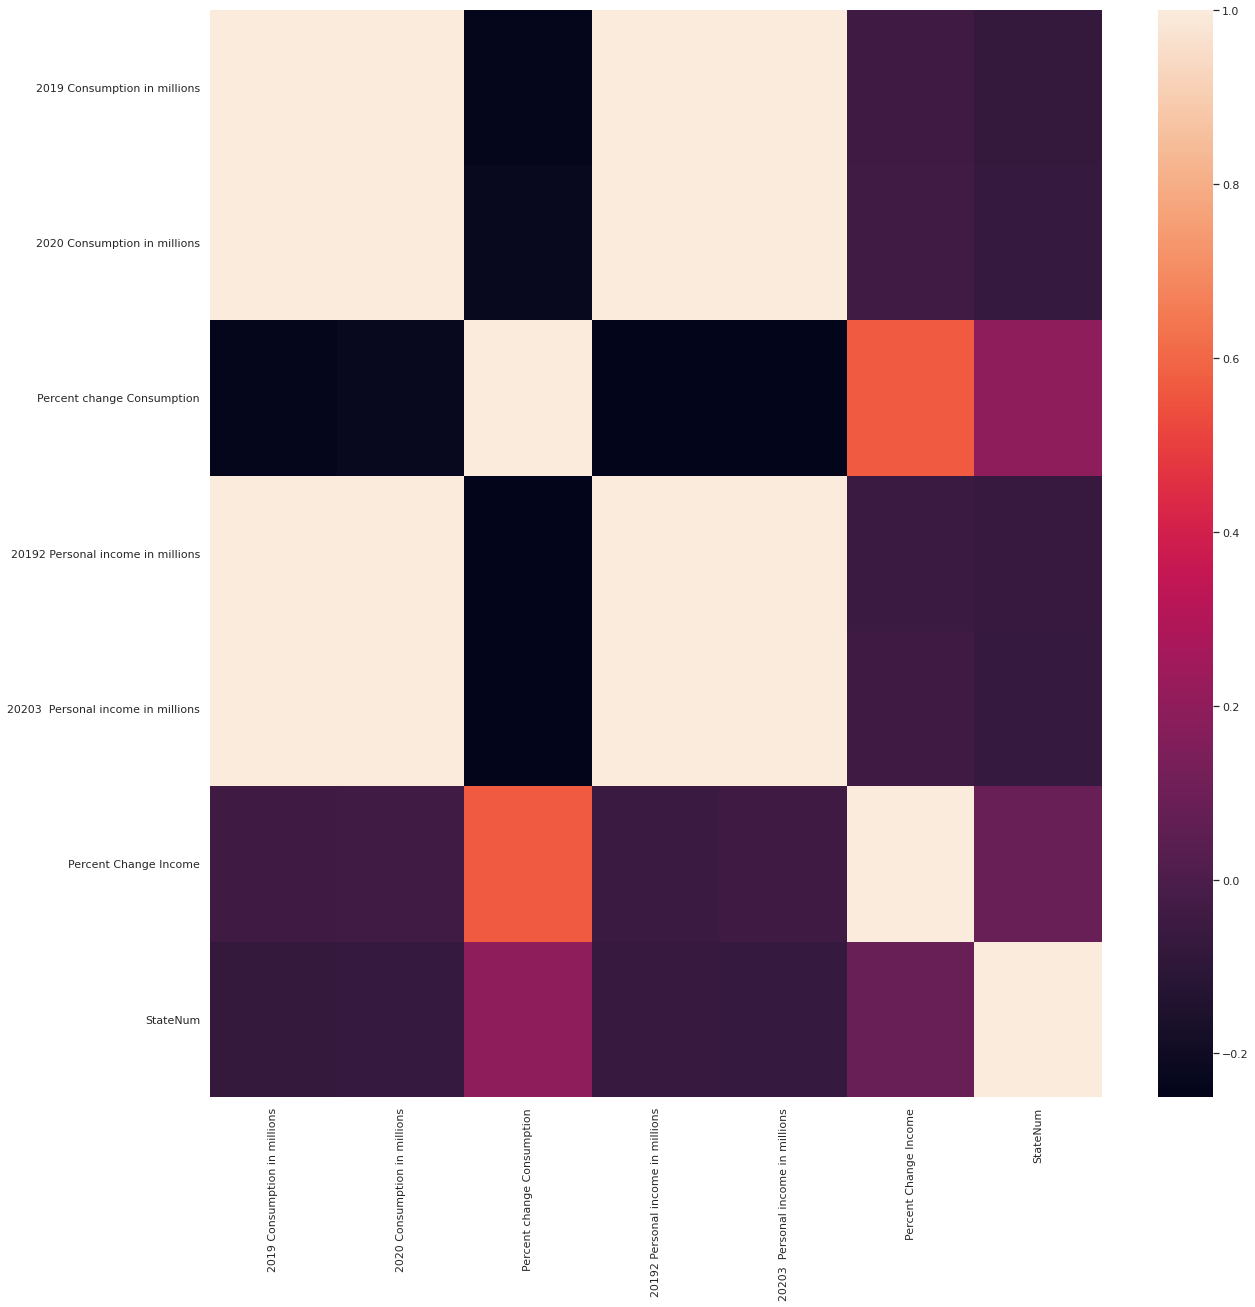

In [ ]:
sns.heatmap(data=corr);